# Python

### 1)  Fizzbuzz

In [1]:
for i in range(1, 101):
    print (not i%3)*'Fuzz'+(not i%5)*'Buzz' or i

1
2
Fuzz
4
Buzz
Fuzz
7
8
Fuzz
Buzz
11
Fuzz
13
14
FuzzBuzz
16
17
Fuzz
19
Buzz
Fuzz
22
23
Fuzz
Buzz
26
Fuzz
28
29
FuzzBuzz
31
32
Fuzz
34
Buzz
Fuzz
37
38
Fuzz
Buzz
41
Fuzz
43
44
FuzzBuzz
46
47
Fuzz
49
Buzz
Fuzz
52
53
Fuzz
Buzz
56
Fuzz
58
59
FuzzBuzz
61
62
Fuzz
64
Buzz
Fuzz
67
68
Fuzz
Buzz
71
Fuzz
73
74
FuzzBuzz
76
77
Fuzz
79
Buzz
Fuzz
82
83
Fuzz
Buzz
86
Fuzz
88
89
FuzzBuzz
91
92
Fuzz
94
Buzz
Fuzz
97
98
Fuzz
Buzz


### 2) Числа Фибоначчи

In [2]:
def fib(n):
    a = 0
    b = 1
    
    for __ in range(n-1):
        a,b = b, a+b
    if n==0:
        print 'Only positive values'
    else:
        if n>1:
            print a
        else:
            print 0
        

In [3]:
fib(100)

218922995834555169026


### 3) Сортировка массива*

In [4]:
def quick_sort(arr):
    less =[]
    equal =[]
    greater = []
    
    if len(arr)>1:
        pivot = arr[0]
        for x in arr:
            if x < pivot:
                less.append(x)
            else:
                if x > pivot:
                    greater.append(x)
                else:
                    equal.append(x)
        return quick_sort(less)+equal+quick_sort(greater)
    else:
        return arr

In [5]:
array = [5,1,5,8,9,6,4,3,1,2,0,11]
quick_sort(array)

[0, 1, 1, 2, 3, 4, 5, 5, 6, 8, 9, 11]

# NumPy

In [6]:
import numpy as np

### 1) Аналоги $np.linspace$

In [7]:
def loop_linspace(start, end, number):
    arr=[]
    #интервалов на один меньше чем точек
    step=float(end-start)/(number-1)
    for __ in range(number):
        arr.append(start)
        start+=step
    return np.array(arr)

In [8]:
def lc_linspace(start, end, number):
    #интервалов на один меньше чем точек
    step=float(end-start)/(number-1)
    return np.array([start+step*n for n in range(number)])

In [9]:
n=1000000

In [10]:
%time loop_linspace(1, 10, n)

Wall time: 278 ms


array([ 1.      ,  1.000009,  1.000018, ...,  9.999982,  9.999991, 10.      ])

In [11]:
%time np.linspace(1, 10, n)

Wall time: 7 ms


array([  1.      ,   1.000009,   1.000018, ...,   9.999982,   9.999991,
        10.      ])

In [12]:
%time lc_linspace(1, 10, n)

Wall time: 205 ms


array([  1.      ,   1.000009,   1.000018, ...,   9.999982,   9.999991,
        10.      ])

In [13]:
#Итог: numpy.linspace работает на порядок быстрее (без конвертации в numpy.ndarray время работы функций сокращается процентов на 20)

### 2) сравнение производительности основных операций $numpy.ndarray$ и $list$

In [14]:
#Создание
%time usual_arr = range(10000000)
%time numpy_arr = np.array(range(10000000))

Wall time: 152 ms
Wall time: 785 ms


In [15]:
print u'Поэлементное сложение'
%time usual_arr = [a+1 for a in usual_arr]
%time numpy_arr+=1
print u'Поэлементное деление'
%time usual_arr = [a/2.0 for a in usual_arr]
%time numpy_arr = numpy_arr/2.0
print u'Поэлементное возведение в степень'
%time usual_arr = [a**3 for a in usual_arr]
%time numpy_arr = numpy_arr**3

Поэлементное сложение
Wall time: 1.23 s
Wall time: 0 ns
Поэлементное деление
Wall time: 1.59 s
Wall time: 31 ms
Поэлементное возведение в степень
Wall time: 2.82 s
Wall time: 745 ms


In [16]:
print 'append'
%time usual_arr.append([1])
%time usual_arr+=[1]
%time numpy_arr+= [1]
print 'sort'
%time usual_arr.sort()
%time numpy_arr.sort()

append
Wall time: 0 ns
Wall time: 0 ns
Wall time: 13 ms
sort
Wall time: 197 ms
Wall time: 185 ms


In [17]:
#Итог: numpy.ndarray в разы быстрее проводит поэлементные операции, но list быстрее создается добавляет новые элементы

# Matplotlib

### 1)+2)+3) вместе

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
x=np.linspace(1,100, 1000)

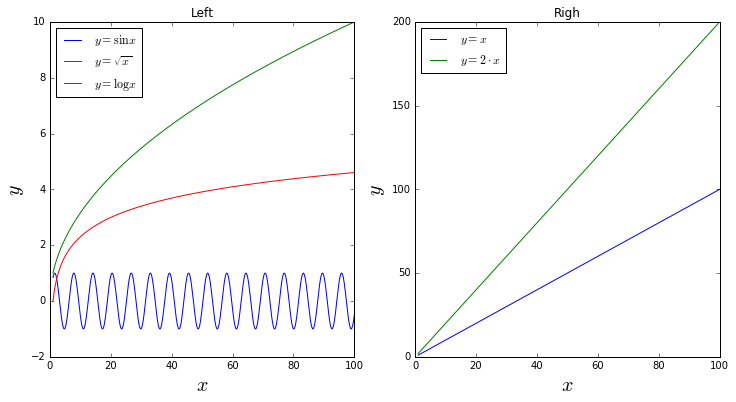

In [20]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_dpi(160)
f.set_figwidth(12)
f.set_figheight(6)


ax1.plot(x, np.sin(x), label = '$y = \sin {x}$')
ax1.plot(x, np.sqrt(x), label = '$y = \sqrt {x}$')
ax1.plot(x, np.log(x), label = '$y = \log {x}$')
ax1.legend(loc = 'upper left')
ax1.set_xlabel('$x$',fontsize = '20')
ax1.set_ylabel('$y$',fontsize = '20')
ax1.set_title('Left')


ax2.plot(x, x, label = '$y = x$')
ax2.plot(x, 2*x, label = '$y = {2}\cdot{x}$')
ax2.legend(loc = 'upper left')
ax2.set_xlabel('$x$',fontsize = '20')
ax2.set_ylabel('$y$',fontsize = '20')
ax2.set_title('Righ')

f.savefig('first HW MPL.png')

In [21]:
#dir(f)

# SciPy

In [22]:
import scipy
from scipy import stats, linalg

### 1) Генерация матрицы случайных чисел 5*5

In [23]:
#генерация стандартного нормального распределения
normal_frozen = stats.norm

In [24]:
matr = np.array([normal_frozen.rvs() for i in range(25)])
matr = matr.reshape(5,5)
matr

array([[ 0.94629725, -0.74401103,  0.07428525,  1.33574473,  0.44208702],
       [ 1.85935956,  0.44996172, -0.60166953, -0.51587056, -2.00789058],
       [-0.63767345, -0.47092399, -2.3112651 , -1.58858197,  0.94641866],
       [-1.11843262,  1.17193276,  0.69095107,  0.6682153 ,  0.27280072],
       [-1.41146384,  0.74583606, -0.15636593, -1.14626913,  0.84523083]])

### 2) Находим собственные числа и собственные вектора

In [25]:
#Собственные числа и собственные вектора
w, v = np.linalg.eig(matr)

In [26]:
print "Собственные числа:\n", w
print "Собственные векторы:\n", v

Собственные числа:
[ 0.44961547+2.5388341j  0.44961547-2.5388341j -2.04662159+0.j
  0.36121940+0.j         1.38461125+0.j       ]
Собственные векторы:
[[-0.18513504+0.38421076j -0.18513504-0.38421076j -0.10728130+0.j
  -0.61234226+0.j         -0.08603164+0.j        ]
 [ 0.67427340+0.j          0.67427340-0.j         -0.09134491+0.j
  -0.42570497+0.j         -0.69919848+0.j        ]
 [ 0.01030388-0.02554927j  0.01030388+0.02554927j -0.96079665+0.j
  -0.13602337+0.j          0.39733048+0.j        ]
 [-0.24995669-0.36224608j -0.24995669+0.36224608j  0.23838610+0.j
   0.23943199+0.j         -0.52649783+0.j        ]
 [-0.11019195-0.39605646j -0.11019195+0.39605646j  0.01373632+0.j
  -0.60661537+0.j          0.26200872+0.j        ]]


### 3) Проверяем, что результаты - действительно собственные числа и собственные векторы

In [27]:
#Нормы разностей произведения матрицы на с.в. и произведения с.в. на с.з.
for i in range(len(w)):
    print np.linalg.norm(np.dot(matr,v[:,i])-w[i]*v[:,i])

4.06821023699e-15
4.06821023699e-15
2.4244087185e-15
1.07979534558e-15
2.39796768847e-15
